In [1]:
import self_distillation
import saving_loading
import generate
import wandb

import util
import os
import torch

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

cwd = os.getcwd()
%reload_ext autoreload
%autoreload 2
!wandb login $WANDB_API_KEY
os.environ['WANDB_NOTEBOOK_NAME'] = "Cin_256_custom.ipynb"


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Paper/.netrc


In [2]:
import random
steps = 2
# prompts = [992,2,  625, 614] # mushroom, shark, gekko (25), tuktuk, kimono
# prompts = [538, 576, 616, 649, 719] #church, venice, rope, stonehenge, piggybank
# prompts = [538, 616, 649, 719] #church, rope, stonehenge, piggybank

prompts = [random.randrange(0, 1000, 1) for i in range(2)]
BASE = r"D:\BACKUP\CURRENT DIFFUSION THESIS"
vertical = False



if vertical:
    shape = (len(prompts), 1)
else:
    shape = (1, len(prompts))
# shape = [1, 4]

In [3]:
import numpy as np
gradient_updates = 4000

In [5]:
(1 / np.append(step_sizes[1:],1))[::-1]

NameError: name 'step_sizes' is not defined

In [4]:
step_sizes = np.arange(64, 0, -2)
update_list = np.exp((1 / np.append(step_sizes[1:],1))[::-1]) / np.sum(np.exp((1 / np.append(step_sizes[1:],1))[::-1]))
update_list = (update_list * gradient_updates /  np.append(step_sizes[1:],1)).astype(int) * 2

print(update_list)

[  8   6   4   4   4   4   4   4   4   4   4   4   6   6   6   6   6   8
   8   8  10  10  12  14  16  18  22  28  36  56 112 226]


In [7]:
step_sizes = np.arange(64, 0, -2)
update_list = np.exp(1 / np.append(step_sizes[1:],1)) / np.sum(np.exp(1 / np.append(step_sizes[1:],1)))
update_list = ( update_list* gradient_updates /  np.append(step_sizes[1:],1)).astype(int) * 2

print(update_list)

[  2   2   2   4   4   4   4   4   4   4   4   4   6   6   6   6   6   8
   8   8  10  10  12  14  16  20  24  30  42  70 182 604]


In [5]:
import math
steps = 64


halvings = math.floor(math.log(64)/math.log(2))
updates_per_halving = int(gradient_updates / halvings)
step_sizes = []
for i in range(halvings):
    step_sizes.append(int((steps) / (2**i)))
update_list = []
for i in step_sizes:
    update_list.append(int(updates_per_halving / int(i/ 2)))

In [9]:
update_list = np.array(update_list)
step_sizes = np.array(step_sizes)

In [10]:
np.sum(update_list * step_sizes)

7912

# CIN:

In [6]:
# config_path=f"{cwd}/models/configs/cin256-v2-custom.yaml"
# original_path=f"{cwd}/models/cin256_original.ckpt"
# dsdi = f"{BASE}\Diffusion_Thesis\cin_256\data\\trained_models_4000\\iterative\cin_DSDI_64_1e-07_4000\\2.pt"
# dsdgl = f"{BASE}\Diffusion_Thesis\cin_256\data\\trained_models_4000\gradual_linear\cin_DSDGL_64_1e-07_4000\\1.pt"
# dsdn = f"{BASE}\Diffusion_Thesis\cin_256\data\\trained_models_4000\\naive\cin_DSDN_64_1e-07_4000\\32.pt"
# dsdgexp = f"{BASE}\Diffusion_Thesis\cin_256\data\\trained_models_4000\gradual_exp\cin_DSDGEXP_64_1e-07_4000\\1.pt"
# tsd = f"{BASE}\Diffusion_Thesis\cin_256\data\\trained_models_previous\TSD\TSD_cin_50k_1e8\\16.pt"


config_path=f"{cwd}/models/configs/cin256-v2-custom copy.yaml"
original_path=f"{cwd}/models/64x64_diffusion.pt"


## All versions

Loading model from c:\Code\Thesis\DSD/models/64x64_diffusion.pt
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 400.92 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 16, 16) = 768 dimensions.
making attention of type 'vanilla' with 512 in_channels


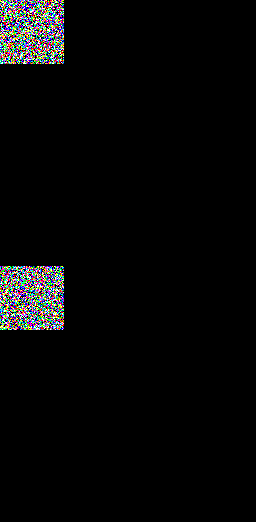

In [15]:
teacher, sampler_student = util.create_models(config_path, original_path, student=False)
new_image, noise_list, prompt_list = generate.ablation(sampler_student, steps=steps, shape=shape, celeb=False, model_type="original", prompts=prompts)
del teacher, sampler_student
torch.cuda.empty_cache()
original_img = new_image
new_image

In [ ]:
teacher, sampler_student = util.create_models(config_path, original_path, student=False)
new_image, noise_list, prompt_list = generate.ablation(sampler_student, steps=64, shape=shape, noise_list = noise_list, celeb=False, model_type="original", prompt_list=prompts)
del teacher, sampler_student
torch.cuda.empty_cache()
original_64_img = new_image
new_image

In [ ]:
student, sampler_student, optimizer, scheduler = util.load_trained(dsdgexp, config_path)
new_image, _, _ = generate.ablation(sampler_student, steps=steps, shape=shape, celeb=False, model_type="DSDGEXP", noise_list=noise_list, prompt_list=prompts)
del optimizer, scheduler, student, sampler_student
torch.cuda.empty_cache()
dsdgexp_img = new_image
new_image

In [ ]:
student, sampler_student, optimizer, scheduler = util.load_trained(dsdi, config_path)
new_image, _, _ = generate.ablation(sampler_student, steps=steps, shape=shape, celeb=False, model_type="DSDI", noise_list=noise_list, prompt_list=prompts)
del optimizer, scheduler, student, sampler_student
torch.cuda.empty_cache()
dsdi_img = new_image
new_image

In [ ]:
student, sampler_student, optimizer, scheduler = util.load_trained(dsdgl, config_path)
new_image, _, _ = generate.ablation(sampler_student, steps=steps, shape=shape, celeb=False, model_type="DSDGL", noise_list=noise_list, prompt_list=prompts)
del optimizer, scheduler, student, sampler_student
torch.cuda.empty_cache()
dsdgl_img = new_image
new_image

In [ ]:
student, sampler_student, optimizer, scheduler = util.load_trained(dsdn, config_path)
new_image, _, _ = generate.ablation(sampler_student, steps=steps, shape=shape, celeb=False, model_type="DSDN", noise_list=noise_list, prompt_list=prompts)
del optimizer, scheduler, student, sampler_student
torch.cuda.empty_cache()
dsdn_img = new_image
new_image

In [ ]:
student, sampler_student, optimizer, scheduler = util.load_trained(tsd, config_path)
new_image, _, _ = generate.ablation(sampler_student, steps=steps, shape=shape, celeb=False, model_type="TSD", noise_list=noise_list, prompt_list=prompts)
del optimizer, scheduler, student, sampler_student
torch.cuda.empty_cache()
tsd_img = new_image
new_image

# Final CIN Grid

In [ ]:
x_labels = ["Original 64", "Original", "TSD", "DSDI", "DSDN", "DSDGL", "DSDGEXP"]
grid = generate.create_horizontal_grid(original_64_img, original_img,tsd_img, dsdi_img, dsdn_img,  dsdgl_img, dsdgexp_img, celeb=False, steps=steps, font_size=20, x_labels=x_labels)
grid

# CELEB

In [343]:
import self_distillation
import saving_loading
import generate
import wandb
import util
import os
import torch

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

cwd = os.getcwd()
%reload_ext autoreload
%autoreload 2
!wandb login 4baa24c4fc6c8eed782cacb721d34977149d4fcb
os.environ['WANDB_NOTEBOOK_NAME'] = "Cin_256_custom.ipynb"


steps = 2
prompts=None
celeb = True

vertical = False


n = 2
if vertical:
    shape = (n, 1)
else:
    shape = (1, n)


# CELEB run:

In [344]:
config_path=f"{cwd}/models/configs/celebahq-ldm-vq-4.yaml"
original_path=f"{cwd}/models/CelebA.ckpt"



dsdi = f"{BASE}\Diffusion_Thesis\cin_256\data\\trained_models\iterative\celeb_DSDI_64_1e-07_4000\\8.pt"
dsdgl = f"{BASE}\Diffusion_Thesis\cin_256\data\\trained_models\gradual_linear\celeb_DSDGL_64_1e-07_4000\\2.pt"
dsdn = f"{BASE}\Diffusion_Thesis\cin_256\data\\trained_models_previous\\final_versions\celeb\DSDN\\32.pt"
dsdgexp = f"{BASE}\Diffusion_Thesis\cin_256\data\\trained_models_4000\gradual_exp\celeb_DSDGEXP_64_1e-07_4000\\2.pt"
tsd = f"{BASE}\Diffusion_Thesis\cin_256\data\\trained_models_previous\\final_versions\celeb\TSD\\2.pt"


## All versions

In [ ]:
teacher, sampler_student = util.create_models(config_path, original_path, student=False)
new_image, noise_list, prompt_list = generate.ablation(sampler_student, steps=steps, shape=shape, celeb=celeb, model_type="original", prompts=prompts)
del teacher, sampler_student
torch.cuda.empty_cache()
original_img = new_image
new_image

In [ ]:
teacher, sampler_student = util.create_models(config_path, original_path, student=False)
new_image, noise_list, prompt_list = generate.ablation(sampler_student, steps=64, shape=shape, noise_list = noise_list, celeb=celeb, model_type="original", prompts=prompts)
del teacher, sampler_student
torch.cuda.empty_cache()
original_64_img = new_image
new_image

In [ ]:
student, sampler_student, optimizer, scheduler = util.load_trained(dsdgexp, config_path)
new_image, _, _ = generate.ablation(sampler_student, steps=steps, shape=shape, celeb=celeb, model_type="DSDGEXP", noise_list=noise_list, prompt_list=prompts)
del optimizer, scheduler, student, sampler_student
torch.cuda.empty_cache()
dsdgexp_img = new_image
new_image

In [ ]:
student, sampler_student, optimizer, scheduler = util.load_trained(dsdi, config_path)
new_image, _, _ = generate.ablation(sampler_student, steps=steps, shape=shape, celeb=celeb, model_type="DSDI", noise_list=noise_list, prompt_list=prompts)
del optimizer, scheduler, student, sampler_student
torch.cuda.empty_cache()
dsdi_img = new_image
new_image

In [ ]:
student, sampler_student, optimizer, scheduler = util.load_trained(dsdgl, config_path)
new_image, _, _ = generate.ablation(sampler_student, steps=steps, shape=shape, celeb=celeb, model_type="DSDGL", noise_list=noise_list, prompt_list=prompts)
del optimizer, scheduler, student, sampler_student
torch.cuda.empty_cache()
dsdgl_img = new_image
new_image

In [ ]:
student, sampler_student, optimizer, scheduler = util.load_trained(dsdn, config_path)
new_image, _, _ = generate.ablation(sampler_student, steps=steps, shape=shape, celeb=celeb, model_type="DSDN", noise_list=noise_list, prompt_list=prompts)
del optimizer, scheduler, student, sampler_student
torch.cuda.empty_cache()
dsdn_img = new_image
new_image

In [ ]:
student, sampler_student, optimizer, scheduler = util.load_trained(tsd, config_path)
new_image, _, _ = generate.ablation(sampler_student, steps=steps, shape=shape, celeb=celeb, model_type="TSD", noise_list=noise_list, prompt_list=prompts)
del optimizer, scheduler, student, sampler_student
torch.cuda.empty_cache()
tsd_img = new_image
new_image

# Final CELEB Grid

In [ ]:
x_labels = ["Original 64", "Original", "TSD", "DSDI", "DSDN", "DSDGL", "DSDGEXP"]
# x_labels=None
grid = generate.create_horizontal_grid(original_64_img, original_img,tsd_img, dsdi_img, dsdn_img,  dsdgl_img, dsdgexp_img, celeb=celeb, steps=steps, x_labels=x_labels, font_size=20)
grid

In [353]:
# grid = generate.create_vertical_grid(original_64_img, original_img,tsd_img, dsdi_img, dsdn_img,  dsdgl_img, dsdgexp_img, celeb=celeb, steps=steps)
# grid